In [ ]:
!pip install roboflow
!pip install ultralytics

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.68 GB
CPU                 Intel Xeon 2.30GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.3>=1.4.1
torch               ✅ 2.0.1+cu118>=1.8.0
torchvision         ✅ 0.15.2+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="F1ty1cwrvf2EkiSoyD3N")
project = rf.workspace("marius-erlenbruch-5nrp8").project("license-plates-d1usk")
dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.196, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to License-Plates-2 in yolov8:: 100%|██████████| 130/130 [00:00<00:00, 1406.25it/s]


In [4]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 231MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/License-Plates-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, b

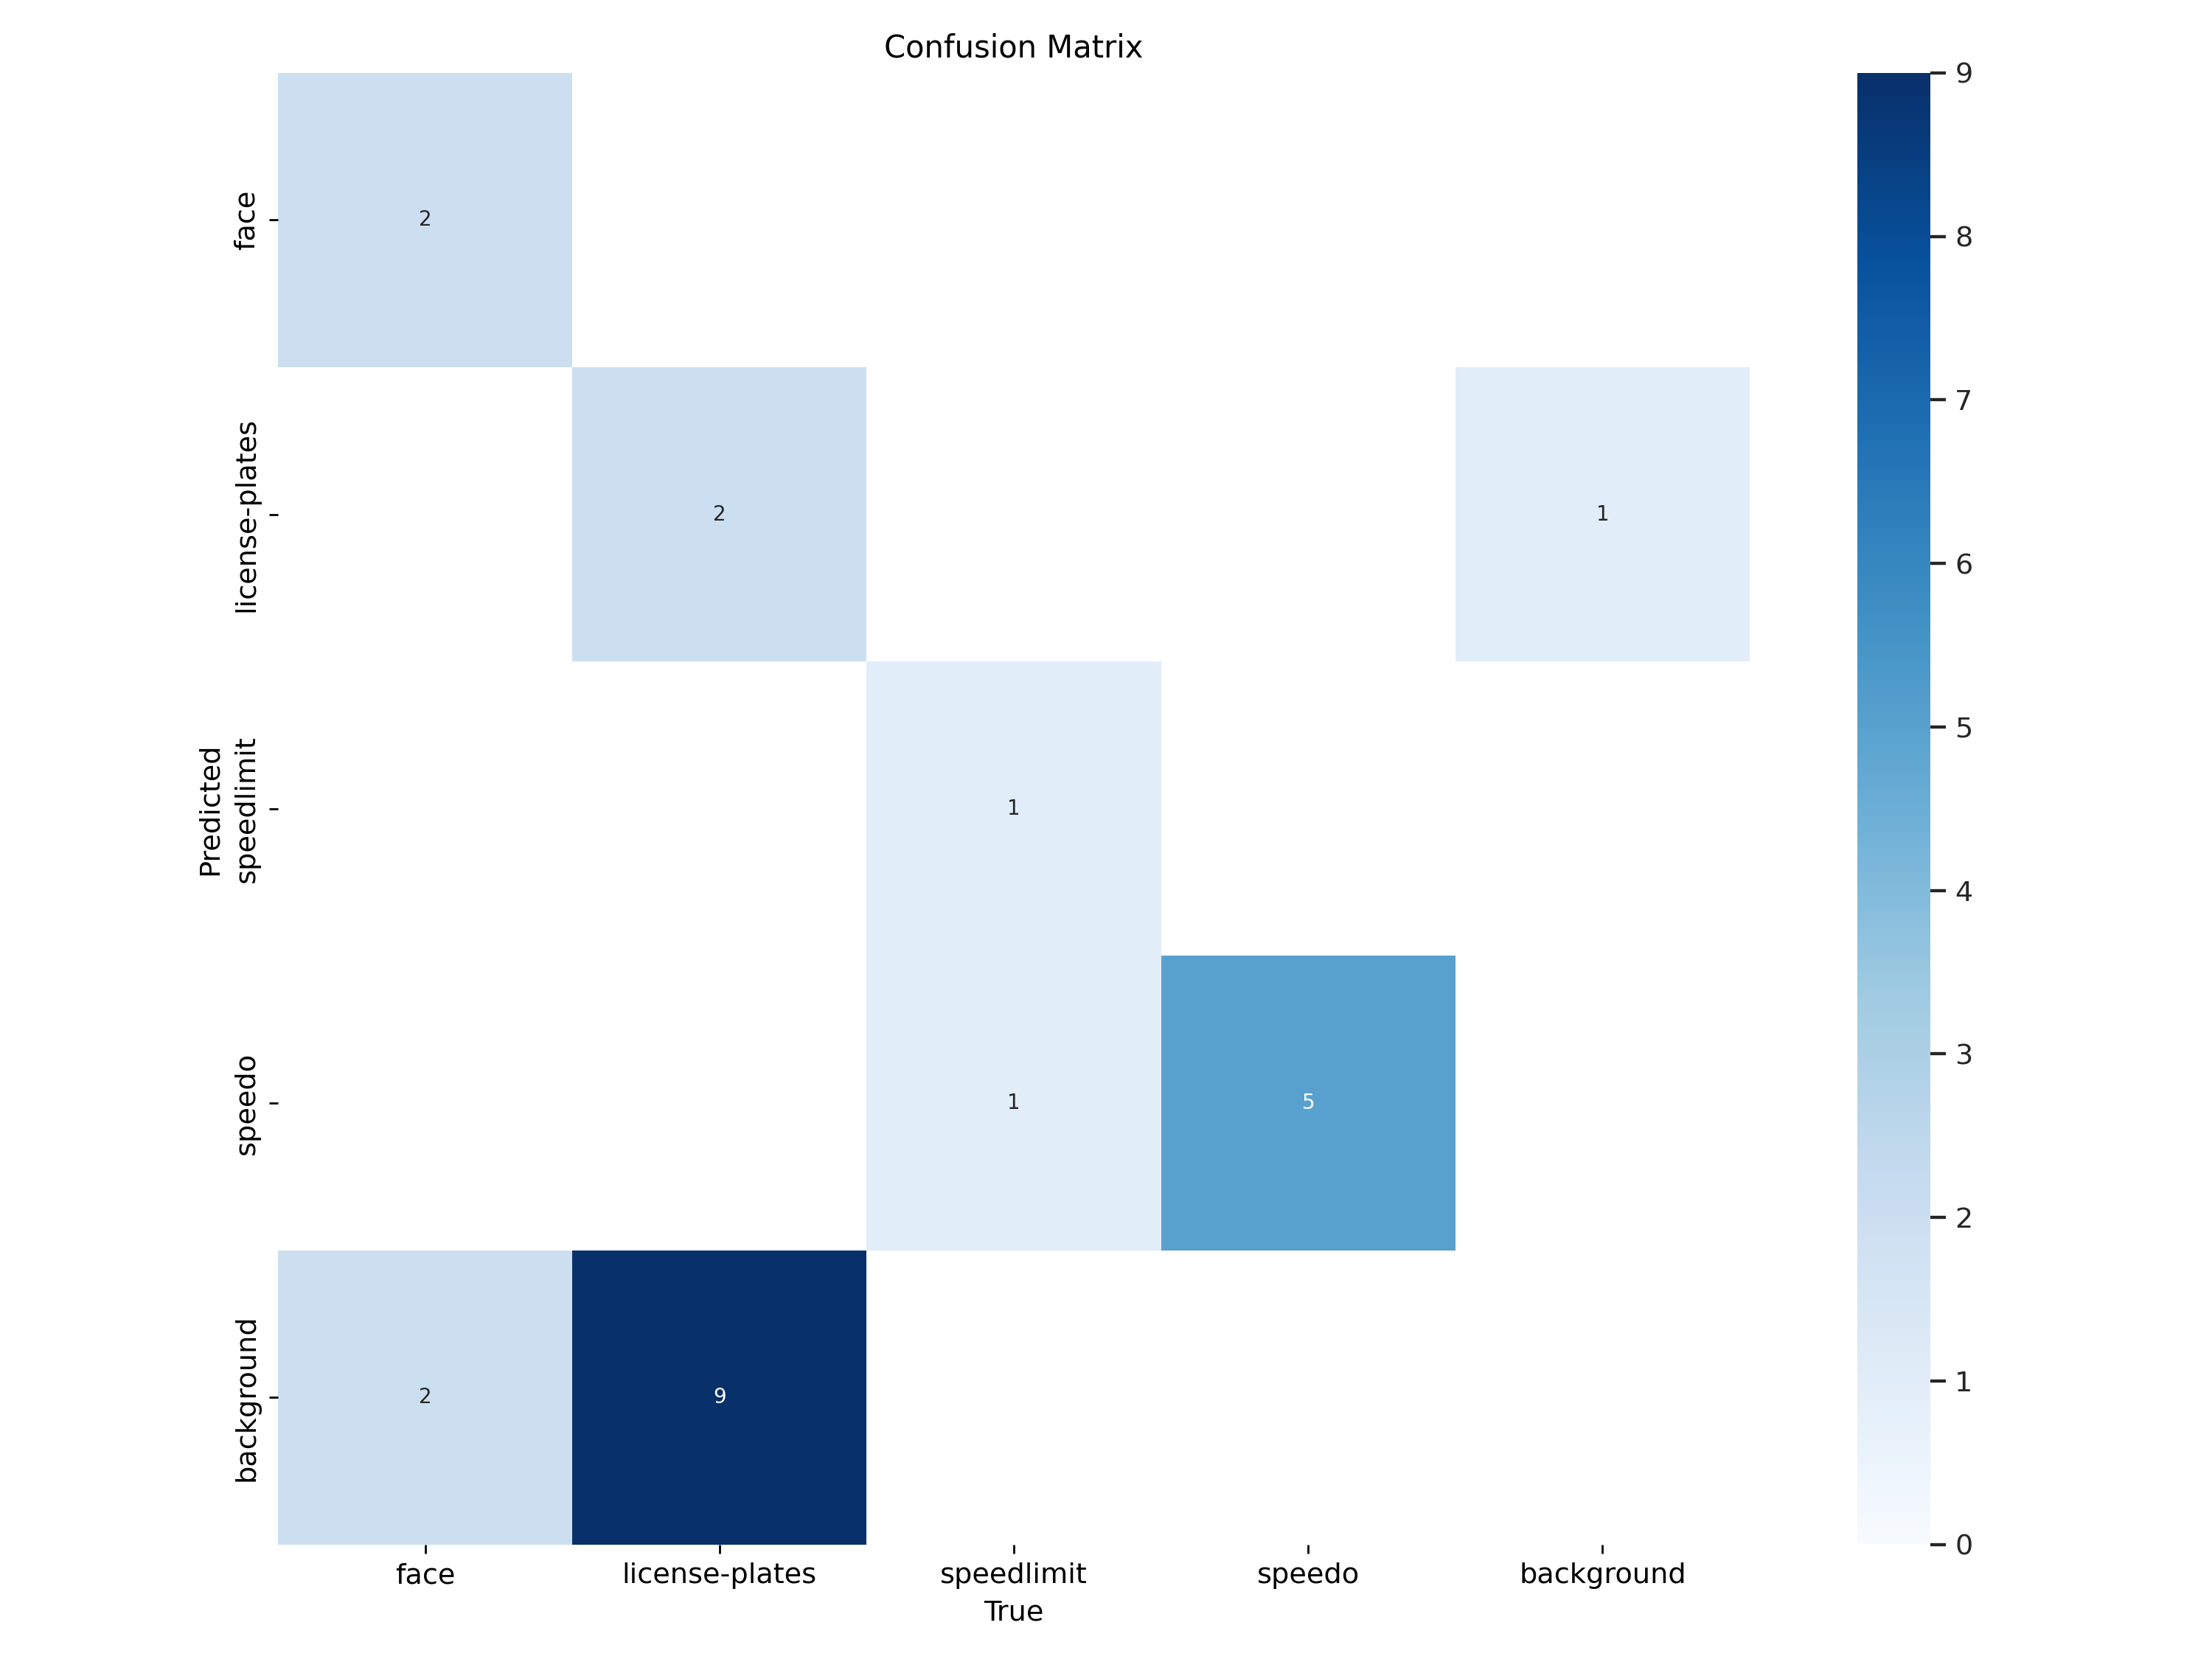

In [5]:
Image(filename= f'/content/runs/detect/train/confusion_matrix.png',width=600)

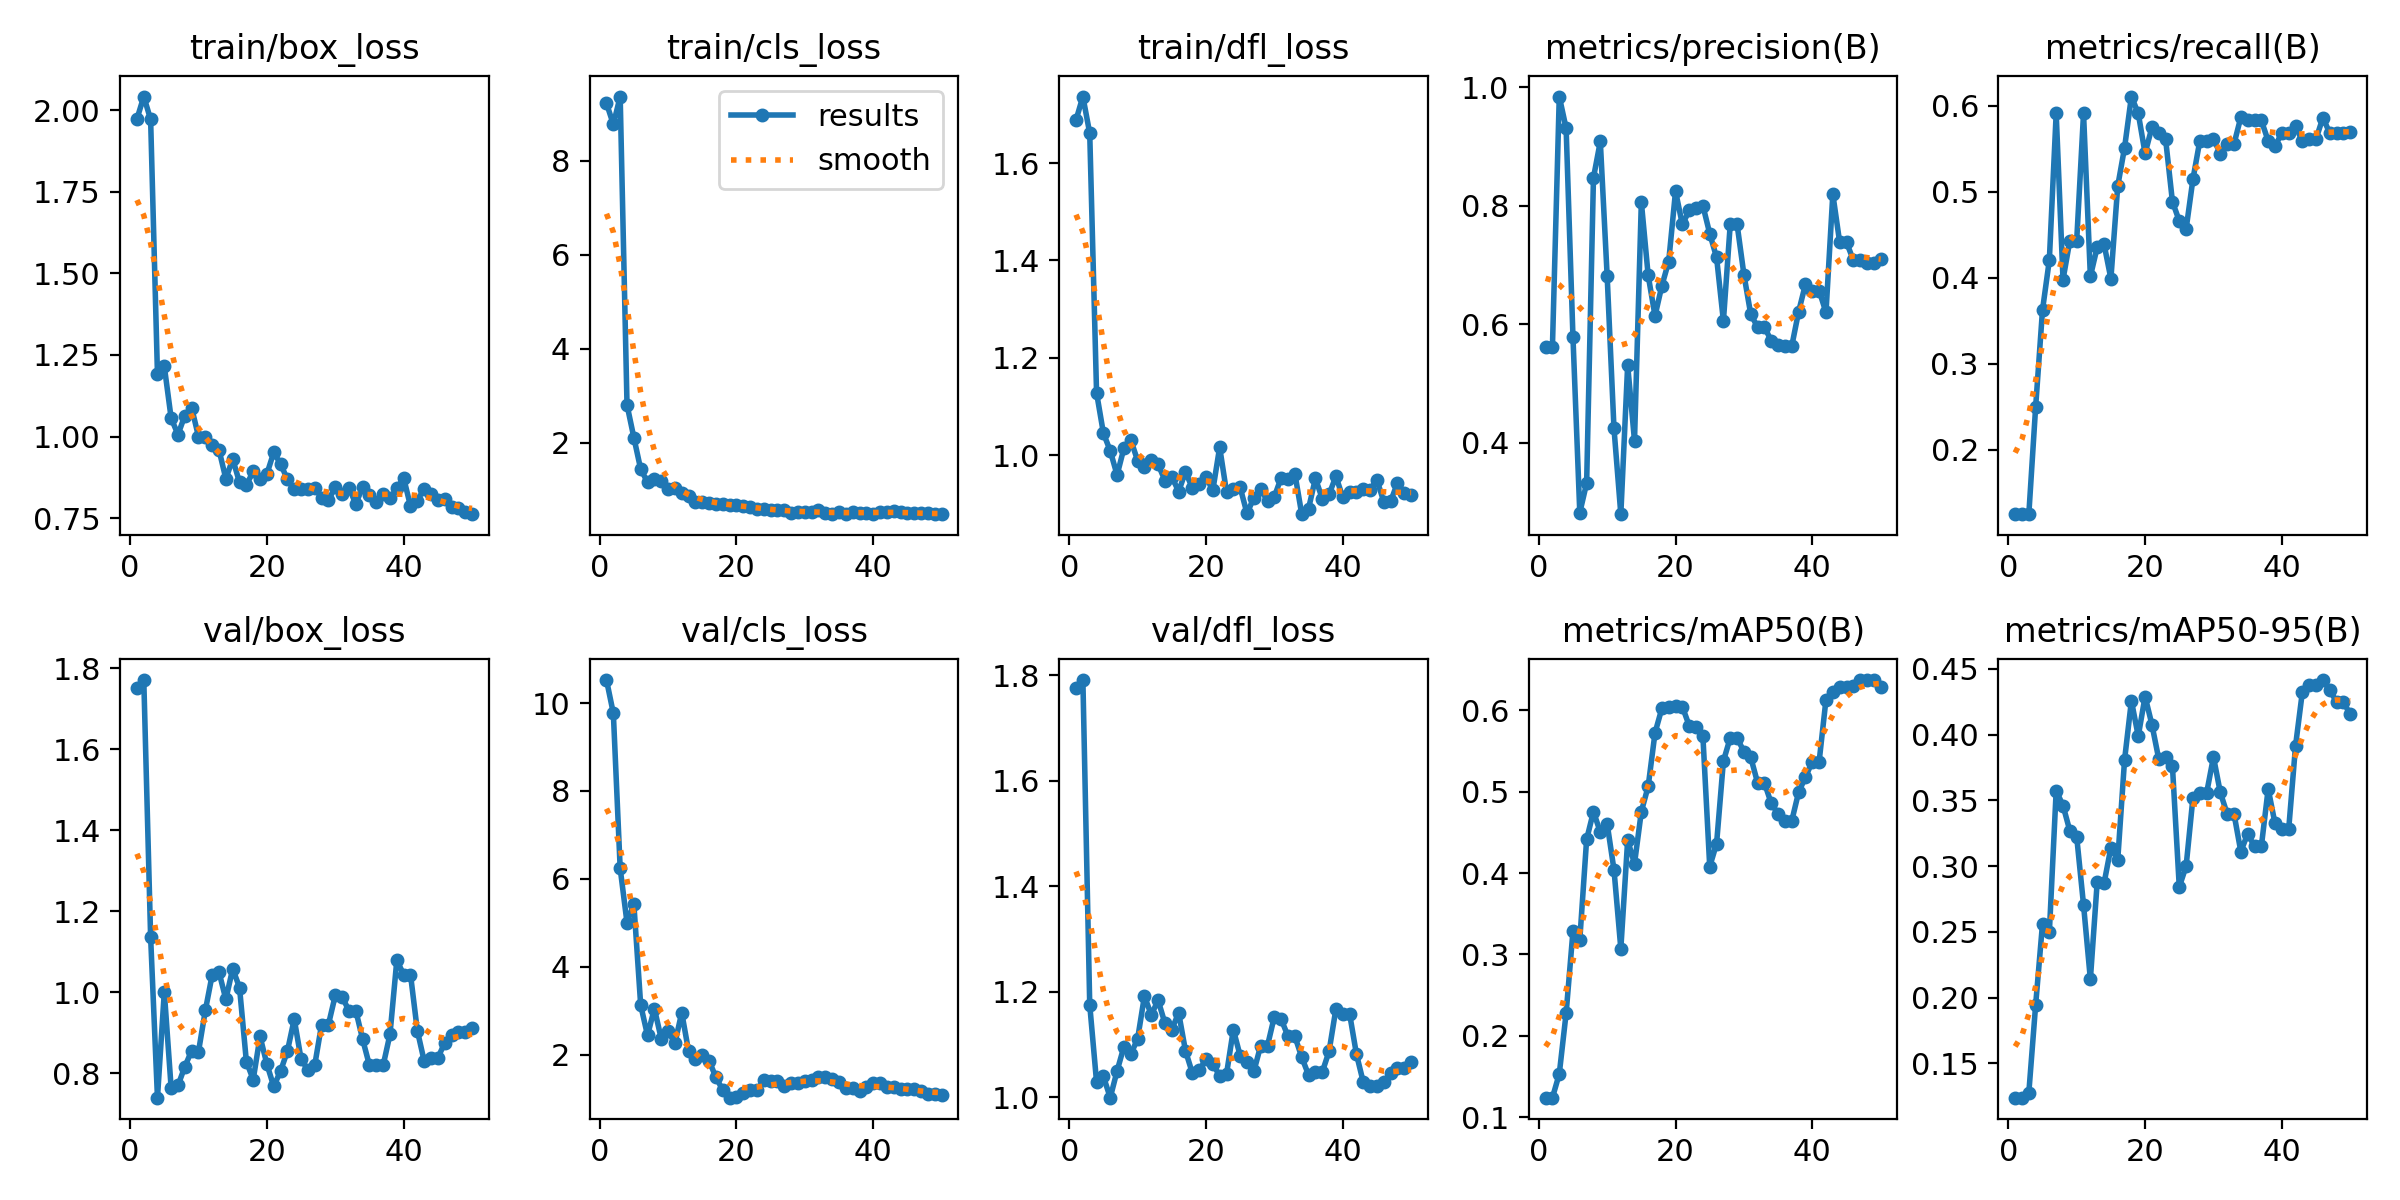

In [6]:
Image(filename= f'/content/runs/detect/train/results.png',width=600)

In [9]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/License-Plates-2/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.02it/s]
                   all          6         22      0.714      0.587      0.631      0.435
                  face          6          4       0.78        0.5      0.547      0.197
        license-plates          6         11      0.791      0.347      0.472      0.247
            speedlimit          6          2      0.547        0.5      0.511      0.409
                speedo          6          5      0.738          1      0.995      0.885
Speed: 0.2ms preprocess, 29.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https:

In [7]:
dataset.location

'/content/License-Plates-2'

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/train/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

image 1/47 /content/License-Plates-2/train/images/Screenshot-2023-10-10-at-18-27-04_png.rf.626300dd32cb0788d39e0e9f90e96f75.jpg: 384x640 2 license-platess, 1 speedo, 108.2ms
image 2/47 /content/License-Plates-2/train/images/Screenshot-2023-10-10-at-18-27-16_png.rf.8335f6b1420889ba49814e6a157b3b9f.jpg: 384x640 2 license-platess, 1 speedo, 25.9ms
image 3/47 /content/License-Plates-2/train/images/Screenshot-2023-10-10-at-18-27-23_png.rf.a7c84404f164f469b5368da1ca78d02b.jpg: 384x640 2 license-platess, 1 speedo, 25.9ms
image 4/47 /content/License-Plates-2/train/images/Screenshot-2023-10-10-at-18-27-33_png.rf.fbfcab9972f38620e46622ab03ca98b0.jpg: 384x640 1 face, 2 license-platess, 1 speedo, 25.9ms
image 5/47 /content/License-Plates-2/train/images/Screenshot-2023-10-10-at-18-27-41_png.rf.fbd3fe25902170a8215863a8e6b8f82d.jpg: 